In [3]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
# reading reviews from json file
with open('../Sentiment-Analysis-NLP-for-Marketing/data/reviews_Video_Games_5.json') as f:
    data = ndjson.load(f)

In [7]:
reviews_df = pd.DataFrame(data)

In [8]:
reviews_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1.0,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4.0,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1.0,Wrong key,1403913600,"06 28, 2014"
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]","I got this version instead of the PS3 version,...",3.0,"awesome game, if it did not crash frequently !!",1315958400,"09 14, 2011"
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,DIRT 3,1308009600,"06 14, 2011"


Data Dictionary
- reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
- asin - ID of the product, e.g. 0000013714
- reviewerName - name of the reviewer
- vote - helpful votes of the review
- style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
- reviewText - text of the review
- overall - rating of the product
- summary - summary of the review
- unixReviewTime - time of the review (unix time)
- reviewTime - time of the review (raw)
- image - images that users post after they have received the product


In [9]:
reviews_df.shape

(231780, 9)

In [10]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231780 entries, 0 to 231779
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewerID      231780 non-null  object 
 1   asin            231780 non-null  object 
 2   reviewerName    228967 non-null  object 
 3   helpful         231780 non-null  object 
 4   reviewText      231780 non-null  object 
 5   overall         231780 non-null  float64
 6   summary         231780 non-null  object 
 7   unixReviewTime  231780 non-null  int64  
 8   reviewTime      231780 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 15.9+ MB


<AxesSubplot:xlabel='overall', ylabel='count'>

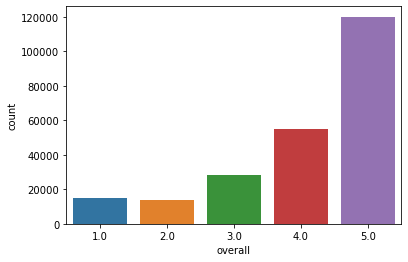

In [11]:
sns.countplot(data = reviews_df, x='overall')

In [12]:
len(reviews_df['asin'].value_counts(dropna=False))

10672

Undersampling of Reviews
Taking a random sample of the reviews by selecting 1500 reviews with rating 1, 500-500-500 reviews with ratings 2, 3, 4, and 1500 reviews with rating 5. This way you get a smaller balanced corpus, on which you will during Milestones 2-4.

In [13]:
one_1500 = reviews_df[reviews_df['overall']==1.0].sample(n=1500)
two_500 = reviews_df[reviews_df['overall']==2.0].sample(n=500)
three_500 = reviews_df[reviews_df['overall']==3.0].sample(n=500)
four_500 = reviews_df[reviews_df['overall']==4.0].sample(n=500)
five_1500 = reviews_df[reviews_df['overall']==5.0].sample(n=1500)

In [14]:
undersampled_reviews = pd.concat([one_1500, two_500, three_500, four_500, five_1500], axis=0)

In [15]:
undersampled_reviews['overall'].value_counts(dropna=False)


1.0    1500
5.0    1500
2.0     500
3.0     500
4.0     500
Name: overall, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

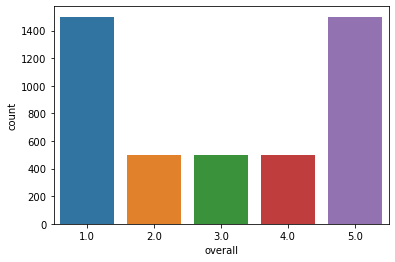

In [16]:
sns.countplot(data=undersampled_reviews, x='overall')

Random Sampling of 100K Reviews

In [17]:
sample_100K_revs = reviews_df.sample(n=100000, random_state=42)


data/reviews_Video_Games_5.json

Writing Corpora

In [28]:
undersampled_reviews.to_csv("/Users/lorenzo/Desktop/Sentiment-Analysis-NLP-for-Marketing/data/small_corpus.csv", index=False)

In [29]:
sample_100K_revs.to_csv("/Users/lorenzo/Desktop/Sentiment-Analysis-NLP-for-Marketing/data/big_corpus.csv", index=False)